In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import optuna
from sklearn.metrics import mean_squared_error

In [58]:
data=pd.read_csv('/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [59]:
data=data.drop(['N','P','K'],axis=1)
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [60]:
data.isna().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [61]:
len(data['label'].unique())

22

/tmp/ipykernel_6142/2484709702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), center = 0, annot = True)


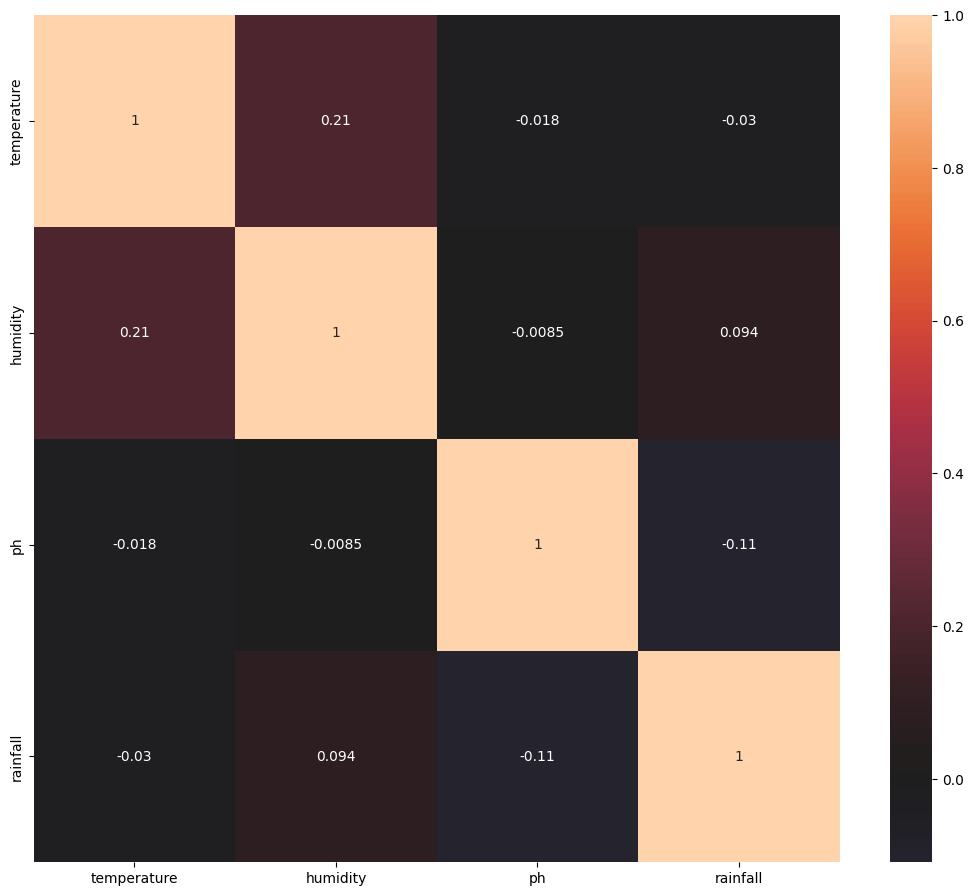

In [62]:
plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

In [63]:
label_encoder = LabelEncoder()
X = data.drop(['label'],axis=1)
y = label_encoder.fit_transform(data["label"])
print(X.shape, y.shape)

(2200, 4) (2200,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.15, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1870, 4), (1870,)
Train Data: (330, 4), (330,)


Accuracy at k = 1 is 0.9121212121212121
Accuracy at k = 2 is 0.8909090909090909
Accuracy at k = 3 is 0.8939393939393939
Accuracy at k = 4 is 0.8818181818181818
Accuracy at k = 5 is 0.8878787878787879
Accuracy at k = 6 is 0.8878787878787879
Accuracy at k = 7 is 0.8878787878787879
Accuracy at k = 8 is 0.8848484848484849
Accuracy at k = 9 is 0.8939393939393939
Accuracy at k = 10 is 0.8878787878787879
Accuracy at k = 11 is 0.8878787878787879
Accuracy at k = 12 is 0.8757575757575757
Accuracy at k = 13 is 0.8787878787878788
Accuracy at k = 14 is 0.8666666666666667
Accuracy at k = 15 is 0.8727272727272727
Accuracy at k = 16 is 0.8606060606060606
Accuracy at k = 17 is 0.8666666666666667
Accuracy at k = 18 is 0.8393939393939394
Accuracy at k = 19 is 0.8454545454545455
Accuracy at k = 20 is 0.8272727272727273
Accuracy at k = 21 is 0.8272727272727273
Accuracy at k = 22 is 0.8242424242424242
Accuracy at k = 23 is 0.8303030303030303
Accuracy at k = 24 is 0.8272727272727273
Accuracy at k = 25 is 0.8

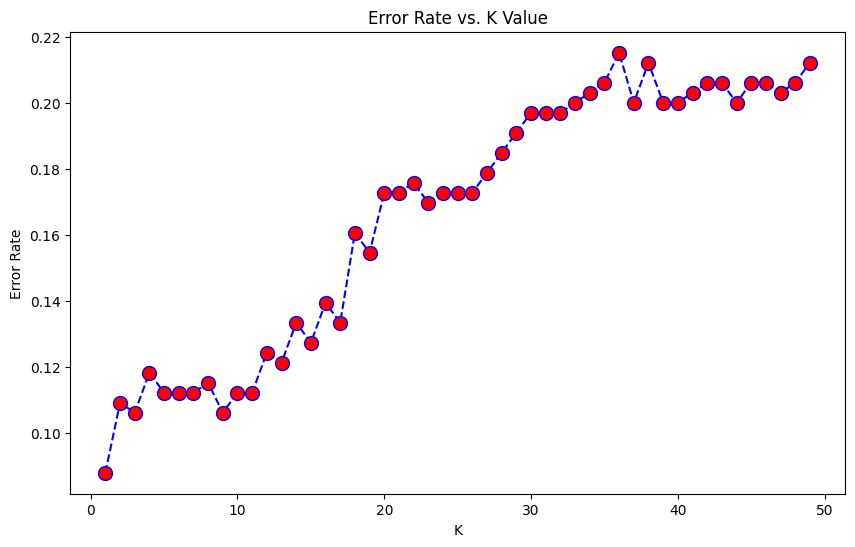

In [65]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [66]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 91.21212121212122%
Accuracy on Whole Data: 98.68181818181819%


In [67]:
knn_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state=128))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 95.75757575757575%
Accuracy on Whole Data: 99.36363636363636%


In [68]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=9,random_state=128))
pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 95.15151515151516%
Accuracy on Whole Data: 99.0909090909091%


In [69]:
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipeline
pipe.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s


Pipeline(steps=[('pca', PCA(n_components=2)), ('std', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())],
         verbose=True)

In [70]:
predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = pipe.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 77.57575757575758%
Accuracy on Whole Data: 96.63636363636363%


In [71]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = pipeline.estimators_[5]

export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X,
                class_names = y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

AttributeError: 'Pipeline' object has no attribute 'estimators_'

In [ ]:
from sklearn import tree
fn=X
cn=y
estimator = pipeline.estimators
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

AttributeError: 'Pipeline' object has no attribute 'estimators'

In [ ]:
knn_pipeline = make_pipeline(StandardScaler(), svm.SVC(random_state=128))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 90.0%
Accuracy on Whole Data: 90.9090909090909%


In [ ]:
knn_pipeline = make_pipeline(StandardScaler(), xgboost.XGBClassifier(learning_rate=0.5))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Accuracy on Test Data: 95.45454545454545%
Accuracy on Whole Data: 99.31818181818181%


In [77]:
label_encoder.inverse_transform(knn_pipeline.predict(X_test[0].reshape(1,-1)))

array(['watermelon'], dtype=object)

In [52]:
X

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507
2196,27.417112,56.636362,6.086922,127.924610
2197,24.131797,67.225123,6.362608,173.322839
2198,26.272418,52.127394,6.758793,127.175293


In [53]:
X_test

array([[ 26.2148837 ,  87.6883982 ,   6.41905219,  59.65590798],
       [ 24.64458469,  85.49938185,   6.34394252,  48.31219031],
       [  9.72445761,  83.74765639,   6.15868941,  74.46411148],
       ...,
       [ 16.43340342,  24.24045875,   5.92667699, 140.3717815 ],
       [ 29.19585548,  68.01965728,   7.44197683,  44.93261911],
       [ 23.08950736,  90.22507299,   6.0967531 , 108.2166601 ]])

In [54]:
y

array([20, 20, 20, ...,  5,  5,  5])